the project aims to use  unsupervised machine learning algorithms for clustering more than 4000 suspected pathways, acquired from gene set enrichment analysis for more than 4000 differentially expressed genes between samples wingless medulloblastoma and group 3 medulloblastoma subgroups.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures
from sklearn.preprocessing import StandardScaler, normalize, RobustScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
sns.set(style='dark')

In [ ]:
df = pd.read_csv('meta_GSEA.csv')

In [ ]:
raw_df = df.copy()

In [ ]:
df.head()

,Name,RNASET2,TSC1,ADNP,LAMA2,POLG2,SLC25A4,PLSCR1,RPL15,PCLO,...,XPNPEP3,INCA1,CST4,CAMK2N2,PPP1R9B,MYOZ1,COL4A3,REST,COL4A5,SPRY2
0,GO_INTRACELLULAR_CALCIUM_ACTIVATED_CHLORIDE_CH...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,VICENT_METASTASIS_UP_signal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,HP_LEFT_VENTRICULAR_SYSTOLIC_DYSFUNCTION_signal,0.000000,0.000000,0.000000,-0.627075,-0.467132,-0.671594,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,HP_FOCAL_WHITE_MATTER_LESIONS_signal,-0.342308,-0.305175,-0.398428,0.000000,-0.467132,-0.671594,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GO_PROFILIN_BINDING_signal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-1.243912,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.sample(5)

,Name,RNASET2,TSC1,ADNP,LAMA2,POLG2,SLC25A4,PLSCR1,RPL15,PCLO,...,XPNPEP3,INCA1,CST4,CAMK2N2,PPP1R9B,MYOZ1,COL4A3,REST,COL4A5,SPRY2
3854,HP_ABNORMALITY_OF_CARTILAGE_OF_EXTERNAL_EAR_si...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3637,REACTOME_PHYSIOLOGICAL_FACTORS_signal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
814,GSE22611_MUTANT_NOD2_VS_CTRL_TRANSDUCED_HEK293...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1669,GSE11057_NAIVE_VS_CENT_MEMORY_CD4_TCELL_DN_signal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3060,HP_ABNORMALITY_OF_THE_TRAGUS_signal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# summary statistics
df.describe()

,RNASET2,TSC1,ADNP,LAMA2,POLG2,SLC25A4,PLSCR1,RPL15,PCLO,ENAH,...,XPNPEP3,INCA1,CST4,CAMK2N2,PPP1R9B,MYOZ1,COL4A3,REST,COL4A5,SPRY2
count,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,...,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000
mean,-0.000082,-0.000073,-0.000096,-0.000151,-0.000224,-0.000323,0.000042,0.000049,-0.000299,-0.000159,...,0.001041,0.000168,0.000115,0.000058,0.000171,0.000740,0.001725,0.004005,0.015546,0.022045
std,0.005305,0.004729,0.006174,0.009718,0.010236,0.014717,0.002739,0.003160,0.019277,0.010237,...,0.018612,0.006272,0.005269,0.003747,0.006352,0.015076,0.021351,0.039214,0.112533,0.167396
min,-0.342308,-0.305175,-0.398428,-0.627075,-0.467132,-0.671594,0.000000,0.000000,-1.243912,-0.660557,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.176720,0.203929,0.000000,0.000000,...,0.333587,0.233707,0.240465,0.241758,0.236721,0.307980,0.265983,0.387846,0.829930,1.292865


# 1.  Data quality check

In [ ]:
# check for null values
df.isnull().sum()

Name       0
RNASET2    0
TSC1       0
ADNP       0
LAMA2      0
          ..
MYOZ1      0
COL4A3     0
REST       0
COL4A5     0
SPRY2      0
Length: 4163, dtype: int64

In [ ]:
# Duplicates
df.duplicated().sum()

0

# 2. Data Dimensionality Reduction

The challenge in this project is the extremely high dimensionality, as over 4000 features are being clustered.

Dienesiolity reduction in this case is essential to reduce noise, promote visualisation, and usage of less computational power.


## Dimensionality reduction using princibal component analysis (PCA)



### Pre-Req: Scale the Dataset
First, lets rescale our feature vectors

In [ ]:
feat_df = df.drop(['Name'], axis=1).copy() 
feat_cols = feat_df.columns

In [ ]:
# dataframe scaling usig Robust Scaler 

scaled_df = RobustScaler().fit_transform(feat_df) 
pd.DataFrame(scaled_df, columns=feat_cols).head()

## Principal Component Analysis (Scikit-Learn PCA)

### Choosing the Right Number of Dimensions that preserve the highest percentage of data

 

In [ ]:
pca = PCA().fit(scaled_df)

In [ ]:
# determination of the components number that preserve not less than 90%  of variance ratio
np.where(np.cumsum(pca.explained_variance_ratio_)>0.90)

(array([ 755,  756,  757, ..., 4159, 4160, 4161]),)

Text(0.5, 1.0, 'Explained Variance')

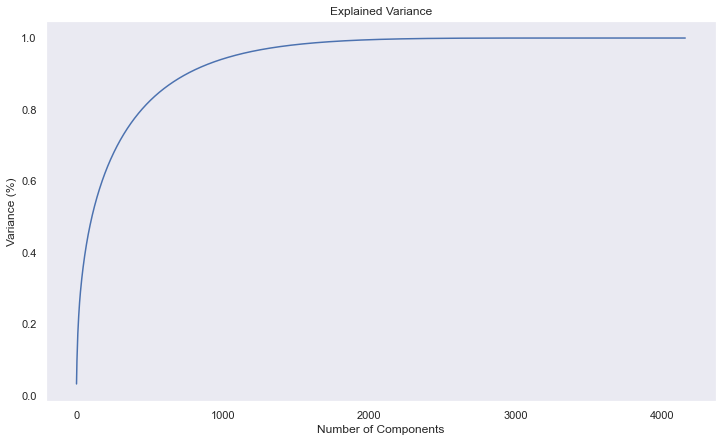

In [ ]:
# Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(12, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')

**As observed from the graph, around 755 components/pathways can capture 90% of the whole variance within the dataset**

In [ ]:
pca = PCA(n_components=755)
pcomponents = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data = pcomponents)

pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,745,746,747,748,749,750,751,752,753,754
0,-0.090918,-0.473562,-0.385990,-0.043307,-0.080938,0.096889,-0.139265,0.021003,-0.236385,-0.010861,...,0.003414,-0.001015,0.000700,0.000964,0.002292,0.003326,-0.001299,-0.000137,-0.001662,0.002013
1,-0.091016,-0.474133,-0.386668,-0.043399,-0.081131,0.097124,-0.139628,0.021061,-0.237086,-0.010898,...,0.005648,0.003511,0.004503,0.000299,0.002015,0.002660,-0.001406,-0.000876,0.002767,0.003237
2,-0.090895,-0.473428,-0.385831,-0.043285,-0.080893,0.096833,-0.139180,0.020989,-0.236220,-0.010852,...,0.003248,-0.000956,0.000726,0.000849,0.002098,0.003122,-0.001248,-0.000145,-0.001611,0.001982
3,-0.090895,-0.473424,-0.385826,-0.043284,-0.080892,0.096832,-0.139178,0.020989,-0.236215,-0.010852,...,0.003244,-0.000955,0.000725,0.000847,0.002095,0.003118,-0.001246,-0.000144,-0.001610,0.001980
4,-0.090940,-0.473688,-0.386140,-0.043327,-0.080981,0.096941,-0.139345,0.021015,-0.236539,-0.010869,...,0.003361,-0.001197,0.000862,0.000769,0.002392,0.003735,-0.001140,0.000127,-0.001910,0.002181


**The target in this step is to define the optimal number of clusters of the 755 component (i.e., pathways)**

One commonly used method is the elbow algorithm, through which the the number of clusters (K) will be a range from 1 to 50 clusters, in our model. subsequently, the model with least number of clusters K that achieve the least data distortion will be selected. 

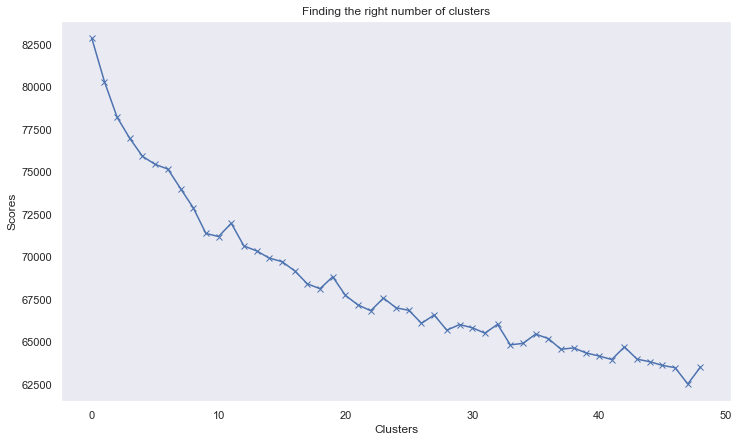

In [ ]:
# Elbow algorithm
scores_1 = []

plt.figure(figsize=(12,7))
range_values = range(1, 50)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pca_df)
    scores_1.append(kmeans.inertia_) 

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

After plotting the elbow curve, 12 clusters is relatively acceptable to be employed.


##  Dimensionality Reduction using auto-encoder model
A second attempt to reduce the data dimensiolity taht differ from PCA, is using autoencoder machine leaning model. the main advantage of this model over PCA is it considers the non-linear transformations


In [ ]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

In [ ]:
encoding_dim = 156 
input_df = Input(shape=(4162,)) 

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(20, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(4162, kernel_initializer = 'glorot_uniform')(x)

autoencoder = Model(input_df, decoded)

encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

In [ ]:
# scaled dataframe fitting
autoencoder.fit(scaled_df, scaled_df, batch_size=200, epochs=50,  verbose=1)

NameError: ignored

In [ ]:
autoencoder.save_weights('autoencoder.h5') 

In [ ]:
pred = encoder.predict(scaled_df)

In [ ]:
pred.shape 

(4164, 20)

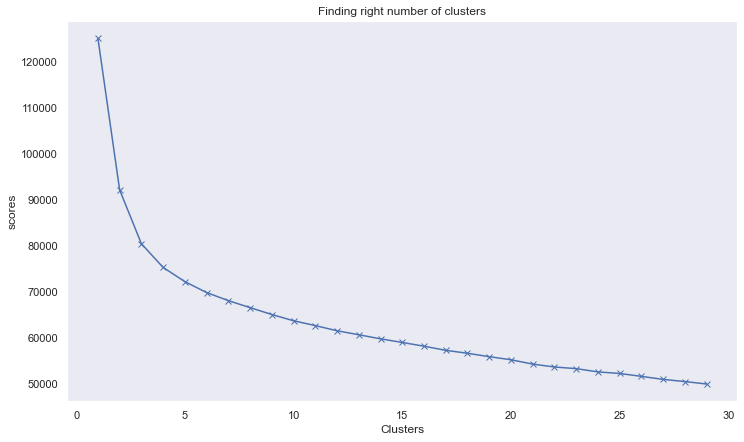

In [ ]:
# plot elbow curve
scores_2 = []

plt.figure(figsize=(12, 7))
range_values = range(1, 30)

for i in range_values:
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(pred)
    scores_2.append(kmeans.inertia_)

plt.plot(range_values,scores_2,'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

Considering the non-linear transformation included in the dataset, the elbow curve shows 5 clusters is relatively acceptable number for the clustering model. Accordingly, the autoencoder model will be further used in the clustering model as it achieves the least number of clusters with relatively minimal data distortion.

### Compare PCA and autoencoder

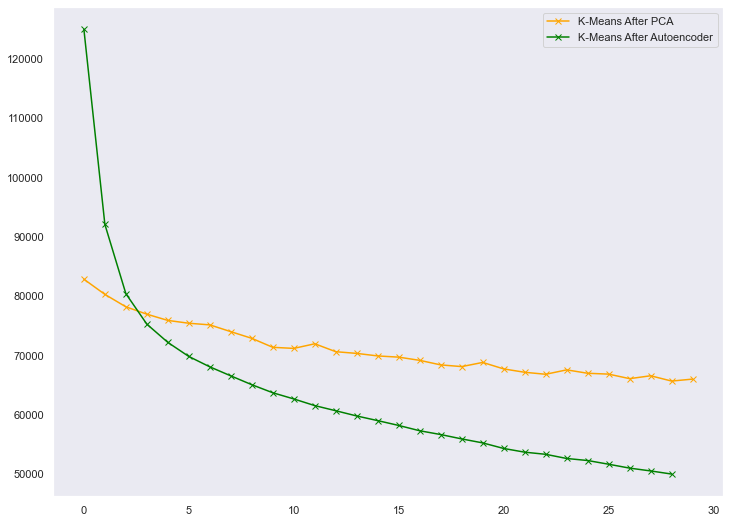

In [ ]:
# comaprison between the elbow curve of the PCA and the autoencoder models
plt.figure(figsize=(12,9))
plt.plot(scores_1[:30], 'bx-', color = 'orange', label='K-Means After PCA')
plt.plot(scores_2, 'bx-', color = 'green', label='K-Means After Autoencoder')
plt.legend(loc='upper right')

## K-Means Clustering based on **5** clusters

In [ ]:
kmeans = KMeans(5) # 5 clusters are used
kmeans.fit(pred) 
k_labels = kmeans.labels_ 
y_kmeans = kmeans.fit_predict(scaled_df) 

### Use PCA to visualize K-Means Clustering Result

In [ ]:
def create_pca_df(dataset, predicted_labels): 
    
    """
    Create a dataframe using PCA principle components and cluster results
    
    Args:
    
    dataset(dataframe): pandas dataframe
    predicted_labels(numpy.ndarray): predicted labels from ML model
    
    """
    
    pca = PCA(n_components=2)
    prin_comp = pca.fit_transform(dataset)
    pca_df = pd.DataFrame(data=prin_comp, columns=['pca1','pca2'])
    pca_df = pd.concat([pca_df,pd.DataFrame({'cluster': predicted_labels})], axis = 1)
    
    return pca_df

def plot_clusters(pca_dataset):
    
    """
    Plot the clusters using scatter pot
    
    Args:
    
    pca_dataset(dataframe): dataframe created from PCA principal components  
    """
    
    plt.figure(figsize=(15,10))
    sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=pca_dataset, palette='rainbow', alpha=0.5)

In [ ]:
kmeans_pca = create_pca_df(pred, k_labels )
kmeans_pca.head()

,pca1,pca2,cluster
0,-4.217032,0.009722,4
1,-4.171329,-0.003861,4
2,-4.147237,0.036305,4
3,-4.214020,0.010537,4
4,-4.026211,0.029669,4


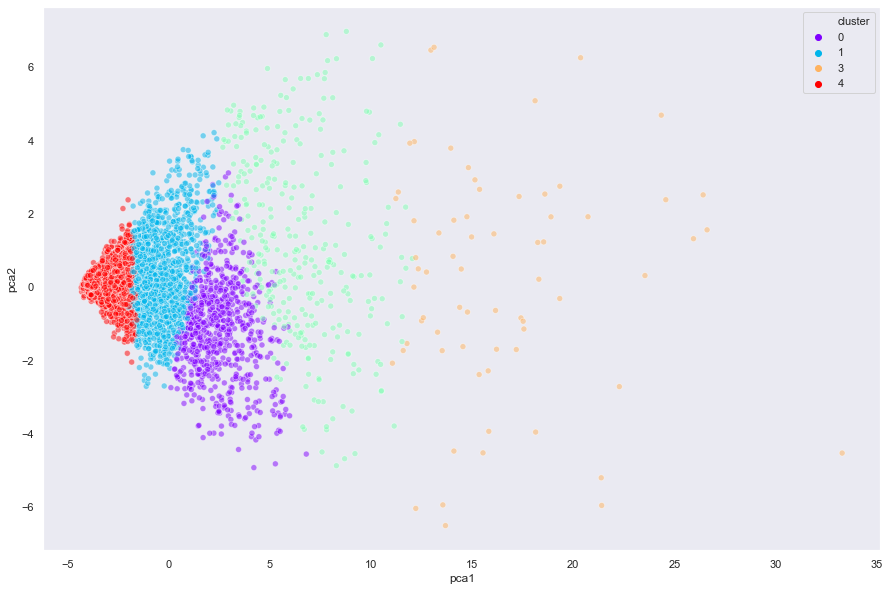

In [ ]:
# cluster plotting
plot_clusters(kmeans_pca)

## Hierarchical Clustering


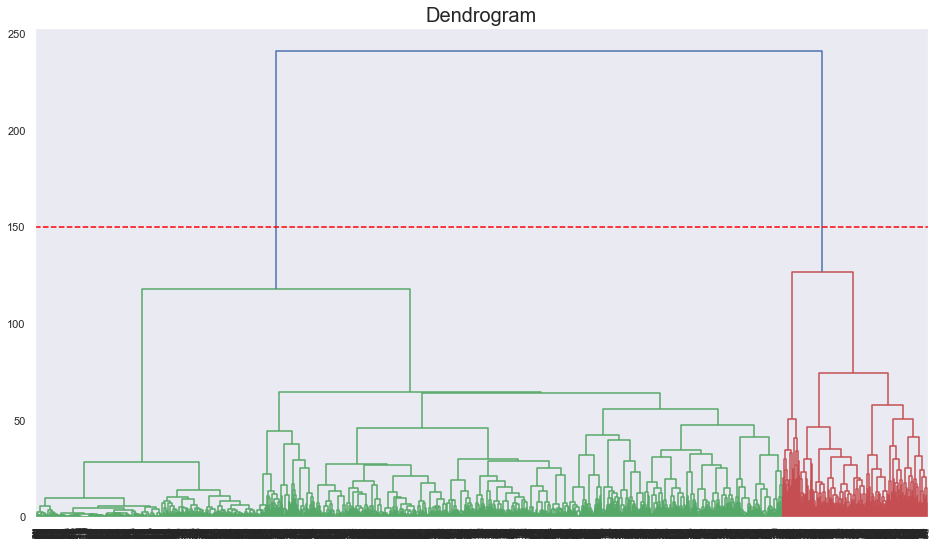

In [ ]:
# Using the dendrogram, the optimal number of clusters can be further simplified using visualised and flexible cut-off (the red dashed line)
import scipy.cluster.hierarchy as hcd
plt.figure(figsize=(16,9))
dendrogram = hcd.dendrogram(hcd.linkage(pred, metric='euclidean', method = 'ward')) # create dendrogram
plt.axhline(y=150, c='red', linestyle='--') # draw a red horizontal line
plt.title('Dendrogram', size=20)
plt.show()

## Pathways clustering using gausian mixure model

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
def SelBest(arr, X):
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [ ]:
# GMM model of 2 to 19 clusters
n_clusters=np.arange(2, 20)
bics=[]
bics_err=[]
iterations=20
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(pred) 
        
        tmp_bic.append(gmm.bic(pred))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

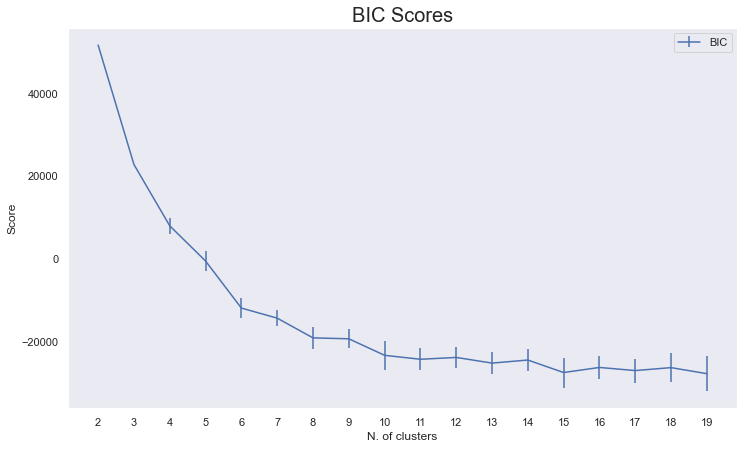

In [ ]:
plt.figure(figsize=(12,7))
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=6)
gmm = gmm.fit(pred)
pred_gmm = gmm.predict(pred)

In [ ]:
gmm_pca = create_pca_df(pred, pred_gmm)

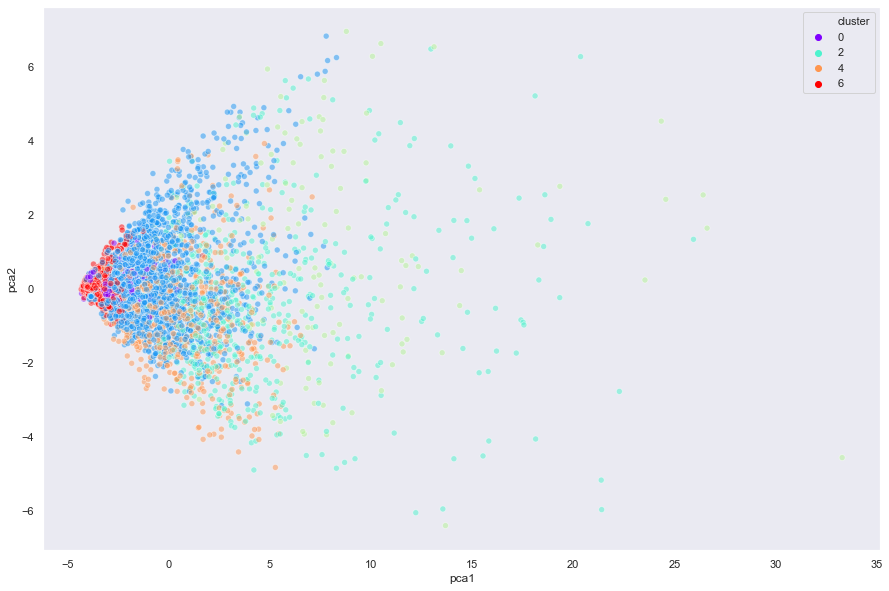

In [ ]:
plot_clusters(gmm_pca)

In [ ]:
cluster_df = pd.concat([raw_df, pd.DataFrame({'cluster':k_labels})], axis = 1)
cluster_df.head()

,Name,RNASET2,TSC1,ADNP,LAMA2,POLG2,SLC25A4,PLSCR1,RPL15,PCLO,...,INCA1,CST4,CAMK2N2,PPP1R9B,MYOZ1,COL4A3,REST,COL4A5,SPRY2,cluster
0,GO_INTRACELLULAR_CALCIUM_ACTIVATED_CHLORIDE_CH...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,VICENT_METASTASIS_UP_signal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,HP_LEFT_VENTRICULAR_SYSTOLIC_DYSFUNCTION_signal,0.000000,0.000000,0.000000,-0.627075,-0.467132,-0.671594,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,HP_FOCAL_WHITE_MATTER_LESIONS_signal,-0.342308,-0.305175,-0.398428,0.000000,-0.467132,-0.671594,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,GO_PROFILIN_BINDING_signal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-1.243912,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [ ]:
cluster_df.to_csv('cluster_df.csv',index=False)

In [ ]:
column_one_clusters = pd.concat([raw_df['Name'], pd.DataFrame({'cluster':k_labels})], axis = 1)
column_one_clusters.head()

,Name,cluster
0,GO_INTRACELLULAR_CALCIUM_ACTIVATED_CHLORIDE_CH...,4
1,VICENT_METASTASIS_UP_signal,4
2,HP_LEFT_VENTRICULAR_SYSTOLIC_DYSFUNCTION_signal,4
3,HP_FOCAL_WHITE_MATTER_LESIONS_signal,4
4,GO_PROFILIN_BINDING_signal,4


In [ ]:
column_one_clusters.to_csv('cluster_df.csv',index=False) 